## 6.2. other gene scores

In this Notebook we plot some other gene signatures in pseudotime. Most of the resulting figures are part of figure 6 and extended figure 5 in our publication.

In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd
import copy

# single cell libraries
import scanpy as sc
sc.settings.verbosity = 0 

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import sklearn as sk #used for L2 normalization
import sklearn.preprocessing #used for L2 normalization

# import own functions
from plotting import *
from utils import *

# autoreload
%load_ext autoreload
%autoreload 2

### Load data and pseudotime

Here, we load the preprocessed HSPC dataset (as filtered in notebook 1.3).

In [2]:
### load Anndata object with the HSPC dataset (all four subsets incl.)
adata_path = "../data/count_matrices/all_filtered.h5ad"
adata = sc.read_h5ad(adata_path)

In [3]:
### load pseudotime 
pseudotime_path = "../results/pseudotime/pseudotime_all_cells.csv"
pseudotime = pd.read_csv(pseudotime_path, sep=",", index_col=0)

In [4]:
### add pseudotime to dataset
adata.obs["pseudotime"] = pseudotime

In [5]:
### ad pseudotemporal ordering to the dataset
adata.obs["pt_ordering"] = np.argsort(np.argsort(adata.obs["pseudotime"]))

In [6]:
### get timepoints and clusters
timepoints = adata.obs["time"].cat.categories.values
clusters = adata.obs['clusters'].cat.categories.values

In [7]:
### load marker genes
marker_genes_path = "../data/gene_lists/biological_process_marker_genes.csv"
marker_genes = pd.read_csv(marker_genes_path, sep=";")

### Processing

In [8]:
### L2 normalize dataset
adata.X = sk.preprocessing.normalize(adata.X, norm='l2')

In [9]:
### scale dataset
scaled_adata = copy.deepcopy(adata)
sc.pp.scale(scaled_adata)

In [10]:
adata.X = adata.X.todense()

### Create plots
Here we are creating different plots that visualize gene signatures (necroptosis and pyroptosis) for different cluster groups, and visualize the expression of individual genes (dotplot). These figures can be found back in figure 6 and extended figure 5 of our publication. 

PS: we wrote the function `plot_in_pseudotime` to plot all types of signatures and genes in pseudotime. Have a look in `plotting.py` to get a better idea of what the function is actually doing.

In [11]:
myeloid_tf_markers = marker_genes['myeloid_TFs'].dropna().values
sc.tl.score_genes(scaled_adata, myeloid_tf_markers, score_name="myeloid TF")

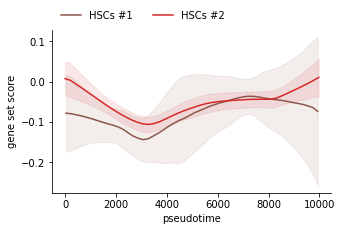

In [12]:
### plot myeloid transcription factor (TF) signature in HSC clusters in PT
plot_in_pseudotime(
    scaled_adata, 
    items=['myeloid TF'], 
    clusters=[['HSCs #1'], ['HSCs #2']], 
    smoothing_window_size=50, 
    scale=False, 
    legend_location='top',
    save=True,
    save_path="../figures/6.2.PT_plot_myeloid_TFs_HSC.pdf")

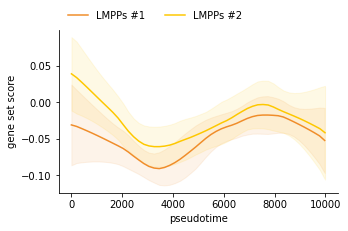

In [13]:
### plot myeloid transcription factor (TF) signature in LMPP clusters in PT
plot_in_pseudotime(
    scaled_adata, 
    items=['myeloid TF'], 
    clusters=[['LMPPs #1'], ['LMPPs #2']], 
    smoothing_window_size=50, 
    scale=False, 
    legend_location='top',
    save=True,
    save_path="../figures/6.2.PT_plot_myeloid_TFs_LMPP.pdf")

In [14]:
monocyte_markers = marker_genes['monocyte_differentiation'].dropna().values
sc.tl.score_genes(scaled_adata, monocyte_markers, score_name="monocyte differentiation")

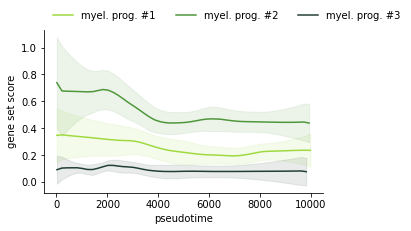

In [15]:
### plot monocyte differentiation signature in myeloid progenitor clusters in PT
plot_in_pseudotime(
    scaled_adata, 
    items=['monocyte differentiation'], 
    clusters=[['myel. prog. #1'],['myel. prog. #2'], ['myel. prog. #3']], 
    smoothing_window_size=50, 
    scale=False, 
    legend_location='top',
    save=True,
    save_path="../figures/6.2.PT_plot_monocyte_differentiation.pdf")

In [16]:
neutrophil_markers = marker_genes['neutrophil_differentiation'].dropna().values
sc.tl.score_genes(scaled_adata, neutrophil_markers, score_name="neutrophil differentiation")

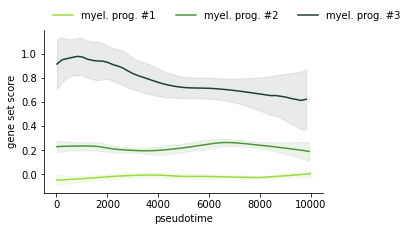

In [17]:
### plot neutrophil differentiation signature in myeloid progenitor clusters in PT
plot_in_pseudotime(
    scaled_adata, 
    items=['neutrophil differentiation'], 
    clusters=[['myel. prog. #1'],['myel. prog. #2'], ['myel. prog. #3']], 
    smoothing_window_size=50, 
    scale=False, 
    legend_location='top',
    save=True,
    save_path="../figures/6.2.PT_plot_neutrophil_differentiation.pdf")

In [18]:
cell_cycle_markers = marker_genes['cell_cycle'].dropna().values
sc.tl.score_genes(scaled_adata, cell_cycle_markers, score_name="cell cycle")

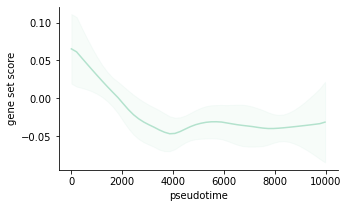

In [19]:
### plot cell cycle signature in myeloid progenitor clusters (combined) in PT
plot_in_pseudotime(
    scaled_adata, 
    items=['cell cycle'], 
    clusters=[['myel. prog. #1','myel. prog. #2','myel. prog. #3']], 
    smoothing_window_size=50,
    plot_legend=False,
    scale=False, 
    legend_location='top',
    save=True,
    save_path="../figures/6.2.PT_plot_cell_cycle_myeloid.pdf")

In [20]:
purine_markers = marker_genes['purine_nucleotide_synthesis'].dropna().values
sc.tl.score_genes(scaled_adata, purine_markers, score_name="purine nucleotide synthesis")

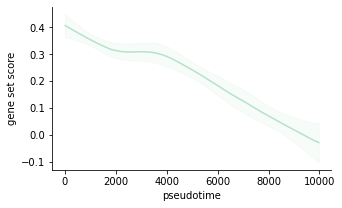

In [21]:
### plot purine nucleotide synthesis signature in myeloid progenitor clusters (combined) in PT
plot_in_pseudotime(
    scaled_adata, 
    items=['purine nucleotide synthesis'], 
    clusters=[['myel. prog. #1','myel. prog. #2','myel. prog. #3']], 
    smoothing_window_size=50,
    plot_legend=False, 
    scale=False, 
    legend_location='top',
    save=True,
    save_path="../figures/6.2.PT_plot_purine_synthesis_myeloid.pdf")

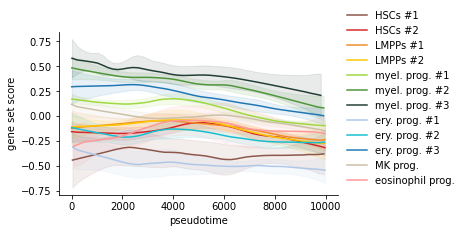

In [22]:
### plot purine nucleotide synthesis signature in all clusters in PT
plot_in_pseudotime(
    scaled_adata, 
    items=['purine nucleotide synthesis'], 
    plot_all_clusters_separate=True, 
    smoothing_window_size=50, 
    scale=False, 
    legend_location='right',
    save=True,
    save_path="../figures/6.2.plot_for_legend.pdf")

In [23]:
myeloid_clusters = ['myel. prog. #1', 'myel. prog. #2', 'myel. prog. #3',]
myeloid_mask = scaled_adata.obs['clusters'].isin(myeloid_clusters)

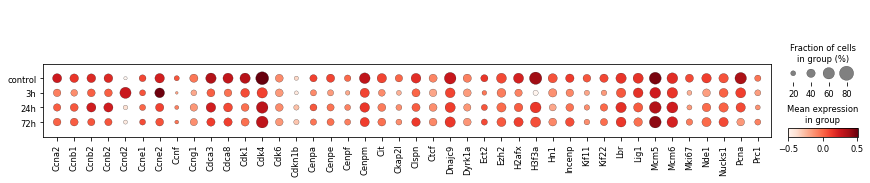

In [24]:
### plot cell cycle marker genes expression in myeloid progenitor clusters (combined)
fig, axs = plt.subplots(
    1, 1, figsize=(len(cell_cycle_markers)*0.3 + 2,2.4))

sc.pl.dotplot(
    scaled_adata[myeloid_mask],
    var_names=cell_cycle_markers,
    groupby="time", 
    standard_scale=None,
    show=False,
    ax=axs
)

save_path = "../figures/6.2.dotplot_cellcycle_markers.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

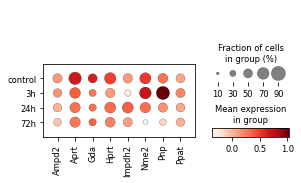

In [25]:
### plot purine nucleotide synthesis marker genes expression in myeloid progenitor clusters (combined)
fig, axs = plt.subplots(
    1, 1, figsize=(len(purine_markers)*0.3 + 2,2.4))

sc.pl.dotplot(
    scaled_adata[myeloid_mask],
    var_names=purine_markers,
    groupby="time", 
    standard_scale=None,
    show=False,
    ax=axs
)

save_path = "../figures/6.2.dotplot_purine_synthesis_markers.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

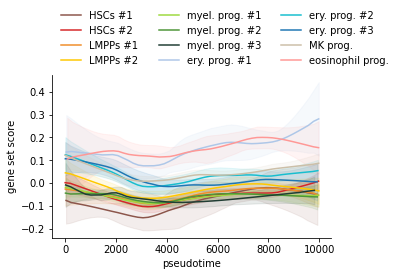

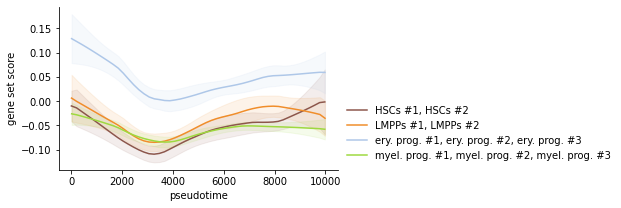

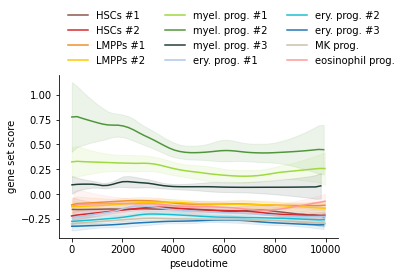

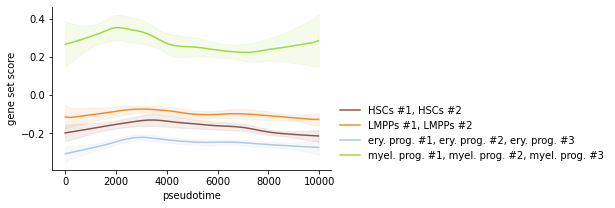

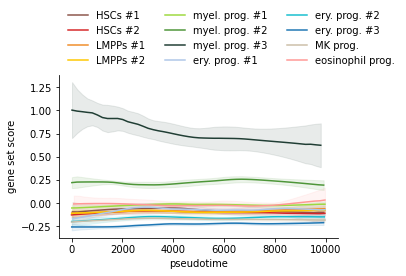

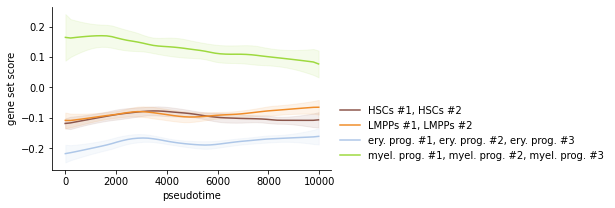

In [26]:
### for different processes, plot the expression in all clusters in PT
### AND plot the expression of cell types (merged clusters) in PT

for item in ['myeloid TF','monocyte differentiation','neutrophil differentiation']:

    plot_in_pseudotime(
        scaled_adata, 
        items=[item],  
        smoothing_window_size=50, 
        scale=False,
        plot_all_clusters_separate = True,
        legend_location='top',
        save=True,
        save_path=f"../figures/6.2.PT_plot_{item}_all_clusters.pdf")
    
    plot_in_pseudotime(
        scaled_adata, 
        items=[item],
        clusters=[
            ['HSCs #1', 'HSCs #2'],
            ['LMPPs #1', 'LMPPs #2'],
            ['ery. prog. #1','ery. prog. #2', 'ery. prog. #3'],
            ['myel. prog. #1', 'myel. prog. #2', 'myel. prog. #3',]
        ],
        smoothing_window_size=300, 
        scale=False,
        legend_location='right',
        save=True,
        save_path=f"../figures/6.2.PT_plot_{item}_merged_clusters.pdf")

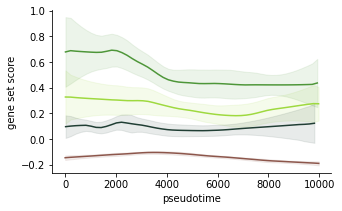

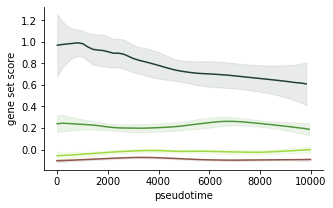

In [27]:
### plot monocyte/neutrophil signature in PT for the myeloid progenitor clusters versus the complete dataset (brown)
for item in ['monocyte differentiation','neutrophil differentiation']:
    
    plot_in_pseudotime(
        scaled_adata, 
        items=[item],
        clusters=[
            ['HSCs #1', 'HSCs #2', 'LMPPs #1', 'LMPPs #2', 'myel. prog. #1',
             'myel. prog. #2', 'myel. prog. #3', 'ery. prog. #1', 'ery. prog. #2',
             'ery. prog. #3', 'MK prog.', 'eosinophil prog.'],
            ['myel. prog. #1'], 
            ['myel. prog. #2'], 
            ['myel. prog. #3'],
        ],
        smoothing_window_size=300, 
        scale=False,
        legend_location=None,
        save=True,
        save_path=f"../figures/6.2.PT_plot_{item}_myeloid_and_all.pdf")

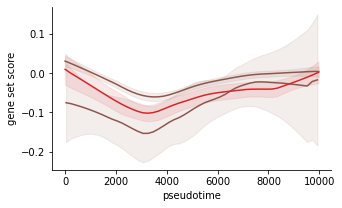

In [28]:
### plot myeloid TF signature in PT for the HSC clusters versus the complete dataset (brown)
plot_in_pseudotime(
    scaled_adata, 
    items=['myeloid TF'],
    clusters=[
        ['HSCs #1', 'HSCs #2', 'LMPPs #1', 'LMPPs #2', 'myel. prog. #1',
         'myel. prog. #2', 'myel. prog. #3', 'ery. prog. #1', 'ery. prog. #2',
         'ery. prog. #3', 'MK prog.', 'eosinophil prog.'],
        ['HSCs #1'], 
        ['HSCs #2'], 
    ],
    smoothing_window_size=300, 
    scale=False,
    legend_location=None,
    save=True,
    save_path=f"../figures/6.2.PT_plot_myeloid_TF_HSC_and_all.pdf")

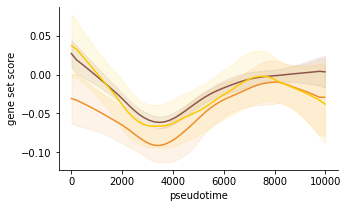

In [29]:
### plot myeloid TF signature in PT for the LMPP clusters versus the complete dataset (brown)
plot_in_pseudotime(
    scaled_adata, 
    items=['myeloid TF'],
    clusters=[
        ['HSCs #1', 'HSCs #2', 'LMPPs #1', 'LMPPs #2', 'myel. prog. #1',
         'myel. prog. #2', 'myel. prog. #3', 'ery. prog. #1', 'ery. prog. #2',
         'ery. prog. #3', 'MK prog.', 'eosinophil prog.'],
        ['LMPPs #1'],
        ['LMPPs #2'],
    ],
    smoothing_window_size=300, 
    scale=False,
    legend_location=None,
    save=True,
    save_path=f"../figures/6.2.PT_plot_myeloid_TF_LMPP_and_all.pdf")